In [1]:
#importing modules
import pandas as pd
import csv
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
import numpy as np
import os
from API_KEYS import grab_api_keys
import pickle
from collections import defaultdict

In [2]:
#IMPORTANT - URL for songs is too long, an adjustment to pandas settings is required
pd.set_option("display.max_colwidth", 10000)

#grabbing API keys from hidden file
CLIENT_ID, SECRET_CLIENT_ID = grab_api_keys()

In [3]:
credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=SECRET_CLIENT_ID)

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [4]:
cwd = os.getcwd()
print (cwd)

C:\Users\abels\Desktop\spotify_scrape\Data_Wrangling


In [5]:
df = pd.read_csv(cwd + r'\final_csv_files\Combined_Top_200_Stream_Numbers.csv')

In [6]:
df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')
mask = (~np.isnan(df['Streams']))
df = df[mask]

In [7]:
df.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date
1,1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrkmtKl66Z,2017-01-01
2,2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi2FVlTVw,2017-01-01
3,3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ3Fk945m,2017-01-01
4,4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF5yJsuaW,2017-01-01
5,5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0xzbwXa3,2017-01-01


In [8]:
unique_artists = df['Artist'].drop_duplicates().to_frame()

In [9]:
unique_artists.head()

,Artist
1,The Weeknd
2,The Chainsmokers
3,DJ Snake
4,Clean Bandit
5,Drake


In [10]:
unique_artists['api_artist'] = ""

In [11]:
unique_artists['api_url'] = ""

In [12]:
unique_artists = unique_artists.reset_index()
unique_artists = unique_artists.drop('index', axis=1)
unique_artists.head()

,Artist,api_artist,api_url
0,The Weeknd,,
1,The Chainsmokers,,
2,DJ Snake,,
3,Clean Bandit,,
4,Drake,,


In [13]:
for x in range(len(unique_artists)):
    placeholder = spotify.search(unique_artists.iloc[x][0])
    if len(placeholder['tracks']['items']) != 0:
        try:
            for counter in range(len(placeholder['tracks']['items'])):
                if unique_artists.iloc[x][0] == placeholder['tracks']['items'][counter]['album']['artists'][0]['name']:
                    unique_artists.at[x,'api_artist'] = placeholder['tracks']['items'][counter]['album']['artists'][0]['name']
                    unique_artists.at[x,'api_url'] = placeholder['tracks']['items'][counter]['album']['artists'][0]['external_urls']['spotify']
        except:
            print (placeholder)
          

In [14]:
unique_artists.head()

,Artist,api_artist,api_url
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4


In [15]:
unique_artists[unique_artists['Artist'] != unique_artists['api_artist']].head()

,Artist,api_artist,api_url
166,La La Land Cast,,
175,Anuel Aa,,
180,Emma Stone,,
184,Grey,,
187,AminÃ©,,


In [16]:
unique_artists['artist_api_id'] = unique_artists['api_url'].str[32:1000]
unique_artists['genres'] = np.NaN
unique_artists['genres'].astype('object')
unique_artists.head()

,Artist,api_artist,api_url,artist_api_id,genres
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ,1Xyo4u8uXC1ZmMpatF05PJ,NaN
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp,69GGBxA162lTqCwzJG5jLp,NaN
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4,540vIaP2JwjQb9dm3aArA4,NaN
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM,6MDME20pz9RveH9rEXvrOM,NaN
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4,3TVXtAsR1Inumwj472S9r4,NaN


In [17]:
unique_artists.shape

(736, 5)

In [18]:
genre_df = unique_artists
genre_df.head()

,Artist,api_artist,api_url,artist_api_id,genres
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ,1Xyo4u8uXC1ZmMpatF05PJ,NaN
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp,69GGBxA162lTqCwzJG5jLp,NaN
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4,540vIaP2JwjQb9dm3aArA4,NaN
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM,6MDME20pz9RveH9rEXvrOM,NaN
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4,3TVXtAsR1Inumwj472S9r4,NaN


In [19]:
genre_df.shape

(736, 5)

In [20]:
genre_df[genre_df['api_url'] == ''].head()

,Artist,api_artist,api_url,artist_api_id,genres
166,La La Land Cast,,,,NaN
175,Anuel Aa,,,,NaN
180,Emma Stone,,,,NaN
184,Grey,,,,NaN
187,AminÃ©,,,,NaN


In [21]:
spotify.artist(genre_df.iloc[1]['artist_api_id'])

{'external_urls': {'spotify': 'https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp'},
 'followers': {'href': None, 'total': 13333273},
 'genres': ['edm', 'electropop', 'pop', 'tropical house'],
 'href': 'https://api.spotify.com/v1/artists/69GGBxA162lTqCwzJG5jLp',
 'id': '69GGBxA162lTqCwzJG5jLp',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/960547a625bc2eb742bb3dd170cbc049d2e94cf9',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/9da714082fe9696529abadc8e4095451221b4483',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/caca64268346846a0753ca894b6ff92bb4dfb864',
   'width': 160}],
 'name': 'The Chainsmokers',
 'popularity': 91,
 'type': 'artist',
 'uri': 'spotify:artist:69GGBxA162lTqCwzJG5jLp'}

In [22]:
genre_df['artist_api_id'].head()

0    1Xyo4u8uXC1ZmMpatF05PJ
1    69GGBxA162lTqCwzJG5jLp
2    540vIaP2JwjQb9dm3aArA4
3    6MDME20pz9RveH9rEXvrOM
4    3TVXtAsR1Inumwj472S9r4
Name: artist_api_id, dtype: object

In [23]:
unique_artists['genres'] = unique_artists['genres'].astype('object')

In [24]:
for x in range(1):
    placeholder = spotify.artist(genre_df.iloc[x]['artist_api_id'])
    try:
        genre_df.at[x,'genres'] = placeholder['genres']
    except:
        genre_df.at[x,'genres'] = 'error'

In [25]:
genre_df.head()

,Artist,api_artist,api_url,artist_api_id,genres
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ,1Xyo4u8uXC1ZmMpatF05PJ,"[canadian contemporary r&b, canadian pop, hip hop, pop, rap]"
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp,69GGBxA162lTqCwzJG5jLp,NaN
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4,540vIaP2JwjQb9dm3aArA4,NaN
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM,6MDME20pz9RveH9rEXvrOM,NaN
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4,3TVXtAsR1Inumwj472S9r4,NaN


In [26]:
for x in range(len(genre_df)):
    if genre_df.iloc[x]['artist_api_id'] != '':
        placeholder = spotify.artist(genre_df.iloc[x]['artist_api_id'])
        try:
            genre_df.at[x,'genres'] = placeholder['genres']
        except:
            genre_df.at[x,'genres'] = 'error'

In [27]:
genre_df[genre_df['genres']=='error'].head()

,Artist,api_artist,api_url,artist_api_id,genres


In [28]:
genre_df[genre_df['genres'].str.len() == 0].head()

,Artist,api_artist,api_url,artist_api_id,genres
37,Nevada,Nevada,https://open.spotify.com/artist/15NtJjjHRFybdNSMyM9smT,15NtJjjHRFybdNSMyM9smT,[]
55,Zay Hilfigerrr,Zay Hilfigerrr,https://open.spotify.com/artist/7nKeLE1toRtW4M279iS26h,7nKeLE1toRtW4M279iS26h,[]
135,MiC LOWRY,MiC LOWRY,https://open.spotify.com/artist/0AJUYWKztkg5dnrHDIBv47,0AJUYWKztkg5dnrHDIBv47,[]
164,Stanaj,Stanaj,https://open.spotify.com/artist/3zrUX1hQrUB9aXcOiyQLmN,3zrUX1hQrUB9aXcOiyQLmN,[]
218,Stormzy,Stormzy,https://open.spotify.com/artist/2SrSdSvpminqmStGELCSNd,2SrSdSvpminqmStGELCSNd,[]


In [29]:
genre_df.head()

,Artist,api_artist,api_url,artist_api_id,genres
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ,1Xyo4u8uXC1ZmMpatF05PJ,"[canadian contemporary r&b, canadian pop, hip hop, pop, rap]"
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp,69GGBxA162lTqCwzJG5jLp,"[edm, electropop, pop, tropical house]"
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4,540vIaP2JwjQb9dm3aArA4,"[dance pop, edm, electronic trap, pop]"
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM,6MDME20pz9RveH9rEXvrOM,"[dance pop, edm, pop, post-teen pop, tropical house, uk dance, uk funky, uk pop]"
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4,3TVXtAsR1Inumwj472S9r4,"[canadian hip hop, canadian pop, hip hop, pop rap, rap, toronto rap]"


In [30]:
len(genre_df.iloc[706]['genres'])

1

In [31]:
genre_df.iloc[706]['genres']

['k-pop']

In [32]:
genre_df.head()

,Artist,api_artist,api_url,artist_api_id,genres
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ,1Xyo4u8uXC1ZmMpatF05PJ,"[canadian contemporary r&b, canadian pop, hip hop, pop, rap]"
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp,69GGBxA162lTqCwzJG5jLp,"[edm, electropop, pop, tropical house]"
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4,540vIaP2JwjQb9dm3aArA4,"[dance pop, edm, electronic trap, pop]"
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM,6MDME20pz9RveH9rEXvrOM,"[dance pop, edm, pop, post-teen pop, tropical house, uk dance, uk funky, uk pop]"
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4,3TVXtAsR1Inumwj472S9r4,"[canadian hip hop, canadian pop, hip hop, pop rap, rap, toronto rap]"


In [33]:
unique_genres = genre_df['genres'].reset_index()

In [34]:
print(unique_genres.iloc[706])

index         706
genres    [k-pop]
Name: 706, dtype: object


In [35]:
print (type(unique_genres.iloc[706]))

<class 'pandas.core.series.Series'>


In [36]:
len(unique_genres)

736

In [37]:
np.isnan(unique_genres.iloc[706]['genres'])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [38]:
type(unique_genres.iloc[44]['genres'])

list

In [39]:
placeholder_list = []
for x in range(len(unique_genres)):
    if type(unique_genres.iloc[x]['genres']) != float:
        print (x)
        placeholder_list.extend(unique_genres.iloc[x]['genres'])
        print (unique_genres.iloc[x]['genres'])

0
['canadian contemporary r&b', 'canadian pop', 'hip hop', 'pop', 'rap']
1
['edm', 'electropop', 'pop', 'tropical house']
2
['dance pop', 'edm', 'electronic trap', 'pop']
3
['dance pop', 'edm', 'pop', 'post-teen pop', 'tropical house', 'uk dance', 'uk funky', 'uk pop']
4
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']
5
['dance pop', 'pop', 'post-teen pop']
6
['pop']
7
['hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap music']
8
['colombian pop', 'dance pop', 'latin', 'latin pop', 'mexican pop', 'pop']
9
['dance pop', 'pop', 'post-teen pop', 'uk pop']
10
['dance pop', 'pop', 'post-teen pop', 'talent show', 'uk pop']
11
['atl hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap music']
12
['dance pop', 'edm', 'electro house', 'moombahton', 'pop', 'tropical house']
13
['big room', 'edm', 'pop', 'progressive house', 'tropical house']
14
['dance pop', 'pop', 'post-teen pop']
15
['aussietronica']
16
['dance pop', 'pop']
17
['canadian pop'

['dance pop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'uk pop', 'viral pop']
207
['alternative rock', 'neo mellow', 'permanent wave', 'pop rock', 'post-grunge', 'rock']
208
['irish rock', 'modern rock', 'neo mellow', 'permanent wave', 'pop rock', 'rock']
209
['chamber pop', 'eau claire indie', 'folk-pop', 'indie folk', 'indie pop', 'melancholia', 'slow core', 'stomp and holler']
210
['hip hop', 'miami hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap music']
211
['alternative metal', 'nu metal', 'post-grunge', 'rap metal']
212
['canadian hip hop', 'pop', 'pop rap', 'rap', 'toronto rap', 'trap music']
213
['latin', 'pop', 'reggaeton', 'tropical']
214
['dance pop', 'electropop', 'pop']
215
['alternative dance', 'australian dance', 'filter house', 'indietronica', 'new rave', 'nu disco']
216
['complextro', 'dance pop', 'edm', 'electro house', 'german techno', 'pop', 'post-teen pop', 'tropical house', 'uk pop']
217
['dance pop', 'pop', 'pop rap', 'post-teen pop', 'r&b']

['metropopolis', 'modern rock', 'pop', 'tropical house']
367
['chicago rap', 'drill', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap music', 'underground hip hop', 'vapor trap']
368
['dance pop', 'pop', 'r&b', 'urban contemporary']
369
['emo rap', 'trap music']
370
['emo rap', 'lgbtq+ hip hop']
371
['bmore', 'edm', 'moombahton', 'ninja', 'pop']
372
['dance pop', 'dance rock', 'disco', 'europop', 'motown', 'new romantic', 'new wave', 'new wave pop', 'soft rock']
373
[]
374
['alabama rap', 'rap', 'trap music', 'underground hip hop', 'vapor trap']
375
['acoustic pop', 'neo mellow', 'pop', 'pop rock']
376
['british soul', 'dance pop', 'pop', 'r&b', 'tropical house', 'uk pop', 'urban contemporary']
377
['adult standards', 'brill building pop', 'easy listening', 'lounge', 'nashville sound', 'rockabilly', 'vocal jazz']
378
['italian hip hop', 'italian underground hip hop', 'rap sardegna']
379
['adult standards', 'brill building pop', 'easy listening', 'lounge', 'mellow gold', 'operati

['australian pop', 'dance pop', 'electropop', 'neo-singer-songwriter', 'pop', 'post-teen pop', 'uk pop', 'viral pop']
651
['australian pop', 'dance pop', 'pop', 'pop rap', 'post-teen pop', 'r&b', 'uk pop']
653
['chicago soul', 'classic soul', 'funk', 'motown', 'neo soul', 'quiet storm', 'r&b', 'soul', 'southern soul', 'vocal jazz']
655
['contemporary country', 'country pop', 'country road', 'modern country rock']
656
['adult standards', 'brill building pop', 'easy listening', 'lounge', 'mellow gold', 'vocal jazz']
657
['new wave pop']
658
['anthem worship', 'ccm', 'christian alternative rock', 'christian music', 'worship']
659
['german hip hop', 'hamburg hip hop']
660
['baile pop', 'brazilian edm', 'funk carioca', 'funk das antigas']
662
['sertanejo', 'sertanejo pop', 'sertanejo universitario']
663
['dance pop', 'pop', 'r&b', 'urban contemporary']
664
['forro', 'funk carioca', 'sertanejo pop']
665
['funk carioca']
666
['sertanejo universitario']
667
['electropop']
668
['pop', 'uk pop']

In [40]:
placeholder_list = list(set(placeholder_list))

In [41]:
placeholder_list

['art rock',
 'ukrainian classical',
 'filter house',
 'florida rap',
 'britpop',
 'memphis soul',
 'rap',
 'british invasion',
 'nc hip hop',
 'permanent wave',
 'uk metalcore',
 'champeta',
 'canadian pop',
 'trap argentino',
 'vocal house',
 'australian hip hop',
 'wrestling',
 'canadian singer-songwriter',
 'k-hop',
 'vallenato',
 'country rock',
 'dutch hip hop',
 'funk rock',
 'jazz funk',
 'melancholia',
 'celtic',
 'hip hop',
 'rap dominicano',
 'swedish idol pop',
 'indie poptimism',
 'progressive electro house',
 'southern hip hop',
 'baile pop',
 'heartland rock',
 'deep big room',
 'k-pop boy group',
 'tropical house',
 'boy band',
 'hard rock',
 'deep pop edm',
 'new french touch',
 'jazz trio',
 'canadian hip hop',
 'neo soul',
 'sunshine pop',
 'europop',
 'uk americana',
 'hands up',
 'adult standards',
 'australian electropop',
 'american folk revival',
 'indie r&b',
 'punk',
 'show tunes',
 'house',
 'trap latino',
 'chicago soul',
 'synthpop',
 'chicago rap',
 'trap 

In [42]:
len(placeholder_list)

411

In [43]:
d = defaultdict(int)
for x in range(len(unique_genres)):
    if type(unique_genres.iloc[x]['genres']) != float:
        for genre in unique_genres.iloc[x]['genres']:
            d[genre] +=1

In [44]:
result = sorted(d.items(), key=lambda kv: kv[1], reverse=True)
print (result)

[('pop', 270), ('dance pop', 156), ('rap', 103), ('pop rap', 102), ('uk pop', 83), ('post-teen pop', 82), ('trap music', 75), ('tropical house', 70), ('hip hop', 66), ('edm', 55), ('r&b', 53), ('latin', 50), ('southern hip hop', 46), ('rock', 45), ('electropop', 40), ('tropical', 38), ('latin pop', 32), ('modern rock', 28), ('reggaeton', 27), ('electro house', 25), ('mellow gold', 23), ('reggaeton flow', 22), ('underground hip hop', 22), ('soft rock', 21), ('german hip hop', 21), ('adult standards', 21), ('funk carioca', 19), ('atl hip hop', 18), ('pop rock', 18), ('australian pop', 17), ('neo mellow', 17), ('latin hip hop', 17), ('indie poptimism', 17), ('permanent wave', 16), ('album rock', 16), ('lounge', 16), ('vocal jazz', 16), ('big room', 15), ('viral pop', 15), ('europop', 14), ('classic rock', 14), ('urban contemporary', 13), ('pop edm', 13), ('vapor trap', 12), ('swedish pop', 11), ('trap latino', 11), ('italian hip hop', 11), ('conscious hip hop', 10), ('metropopolis', 10), 

In [45]:
import matplotlib.pyplot as plt

In [46]:
from collections import Counter

In [47]:
scores = Counter(result)
scores = scores.most_common(10)

In [48]:
popular = result

In [49]:
print (scores)

[(('pop', 270), 1), (('dance pop', 156), 1), (('rap', 103), 1), (('pop rap', 102), 1), (('uk pop', 83), 1), (('post-teen pop', 82), 1), (('trap music', 75), 1), (('tropical house', 70), 1), (('hip hop', 66), 1), (('edm', 55), 1)]


In [50]:
x,y = zip(*scores)
x,y = zip(*x)

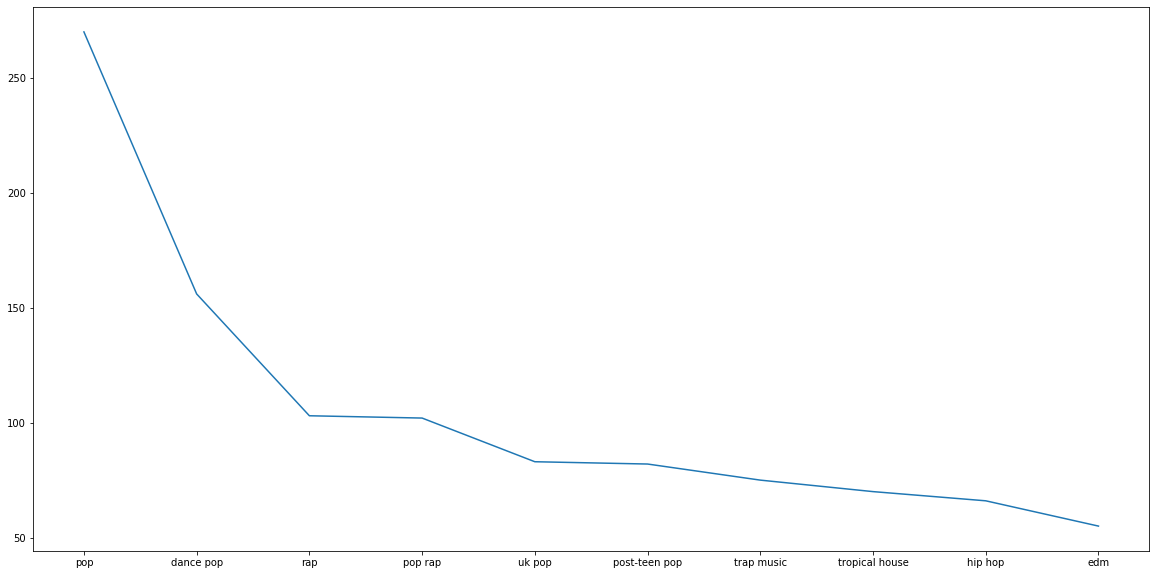

In [51]:
_ = plt.figure(figsize=(20,10))
_ = plt.plot(x,y)

In [54]:
song_analysis = pd.read_csv(r'C:\Users\abels\Desktop\spotify_scrape\Data_Wrangling\final_csv_files\song_analysis_data.csv')
song_analysis.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.681,0.594,7,-7.028,1,0.2820,0.16500,0.000003,0.134,0.535,186.054,audio_features,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,https://api.spotify.com/v1/tracks/5aAx2yezTd8zXrkmtKl66Z,https://api.spotify.com/v1/audio-analysis/5aAx2yezTd8zXrkmtKl66Z,230453,4
1,0.748,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.111,0.661,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/audio-analysis/7BKLCZ1jbUBVqRi2FVlTVw,244960,4
2,0.476,0.718,8,-5.309,1,0.0576,0.07840,0.000010,0.122,0.142,199.864,audio_features,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m,https://api.spotify.com/v1/tracks/4pdPtRcBmOSQDlJ3Fk945m,https://api.spotify.com/v1/audio-analysis/4pdPtRcBmOSQDlJ3Fk945m,205947,4
3,0.720,0.763,9,-4.068,0,0.0523,0.40600,0.000000,0.180,0.742,101.965,audio_features,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/audio-analysis/5knuzwU65gJK7IF5yJsuaW,251088,4
4,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,audio_features,1xznGGDReH1oQq0xzbwXa3,spotify:track:1xznGGDReH1oQq0xzbwXa3,https://api.spotify.com/v1/tracks/1xznGGDReH1oQq0xzbwXa3,https://api.spotify.com/v1/audio-analysis/1xznGGDReH1oQq0xzbwXa3,173987,4


In [55]:
df['track_id'] = df['URL'].str[32:1000]
df.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,track_id
1,1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrkmtKl66Z,2017-01-01,aAx2yezTd8zXrkmtKl66Z
2,2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi2FVlTVw,2017-01-01,BKLCZ1jbUBVqRi2FVlTVw
3,3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ3Fk945m,2017-01-01,pdPtRcBmOSQDlJ3Fk945m
4,4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF5yJsuaW,2017-01-01,knuzwU65gJK7IF5yJsuaW
5,5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0xzbwXa3,2017-01-01,xznGGDReH1oQq0xzbwXa3


In [56]:
df.merge(song_analysis, how='inner', left_on='track_id', right_on='id')
df.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,track_id
1,1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrkmtKl66Z,2017-01-01,aAx2yezTd8zXrkmtKl66Z
2,2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi2FVlTVw,2017-01-01,BKLCZ1jbUBVqRi2FVlTVw
3,3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ3Fk945m,2017-01-01,pdPtRcBmOSQDlJ3Fk945m
4,4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF5yJsuaW,2017-01-01,knuzwU65gJK7IF5yJsuaW
5,5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0xzbwXa3,2017-01-01,xznGGDReH1oQq0xzbwXa3
